# Leyes de los Grandes Números
En este cuaderno simularemos la aproximación Poisson a Binomial y visualizaremos la convergencia de la Ley Fuerte de los Grandes Números.

### Aproximación Poisson a Binomial

**Pseudo-Código para simular la Aproximación Poisson a Binomial**

1. Generar una muestra $Bin(n,p)$ para $n$ grande y $p$ pequeño.
2. Tomar $\lambda = np$ y generar una muestra $Poi(\lambda)$.
3. Comparar ambos histogramas.

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

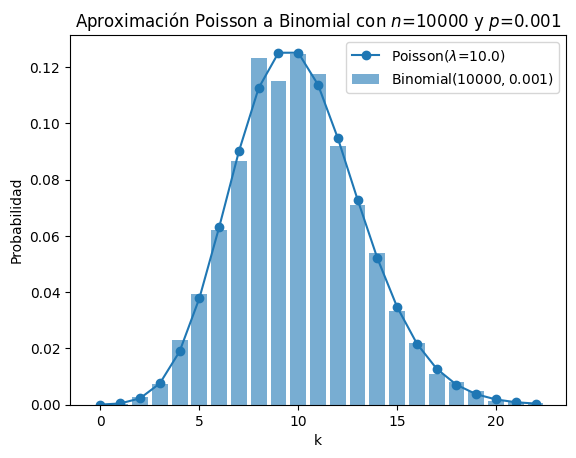

In [25]:
# Definimos los parámetros
n = 10000
p = 0.001
lam = n * p
Nsim = 5000
sims = np.random.binomial(n, p, size=Nsim)

# Histograma de la normal
counts, bins = np.histogram(sims, bins=range(0, int(max(sims))+2), density=True)

# Soporte de la Poisson
xs = np.arange(len(counts))

# Evaluamos la masa poisson en xs
pmf_poisson = st.poisson.pmf(xs, mu=lam)

# Graficamos
plt.bar(xs, counts, alpha=0.6, label=f'Binomial$({n},{p})$')
plt.plot(xs, pmf_poisson, marker='o', linestyle='-', label=f'Poisson($\\lambda$={lam})')
plt.legend()
plt.xlabel('k')
plt.title('Aproximación')
plt.ylabel('Probabilidad')
plt.title(f'Aproximación Poisson a Binomial con $n$={n} y $p$={p}')
plt.show()

Ahora haremos una función que reciba $n$, $p$ y devuelva dicho gráfico

In [19]:
def aprox(n,p):
  lam = n*p
  Nsim = 5000
  sims = np.random.binomial(n, p, size=Nsim)
  counts, bins = np.histogram(sims, bins=range(0, int(max(sims))+2), density=True)
  xs = np.arange(len(counts))
  pmf_poisson = st.poisson.pmf(xs, mu=lam)

  plt.figure()
  plt.bar(xs, counts, alpha=0.6, label=f'Binomial$({n},{p})$')
  plt.plot(xs, pmf_poisson, marker='o', linestyle='-', label=f'Poisson($\\lambda$={lam})')
  plt.title(f'Aproximación Poisson a Binomial con $n$={n} y $p$={p}')
  plt.legend()
  plt.xlabel('k')
  plt.ylabel('Probabilidad')
  plt.show()

  return None

Veamos qué pasa si $n$ no es grande o $p$ no es pequeña.

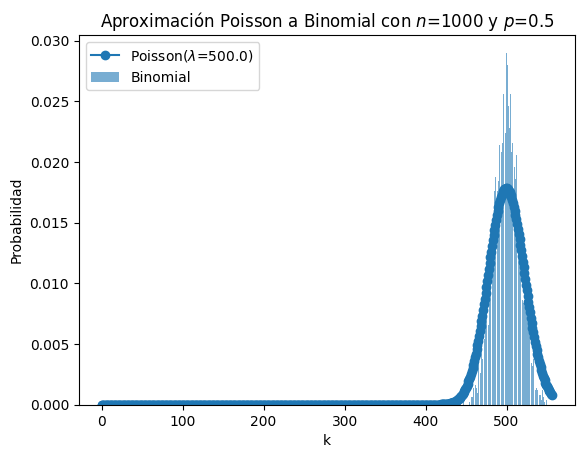

In [20]:
aprox(1000, 0.5)

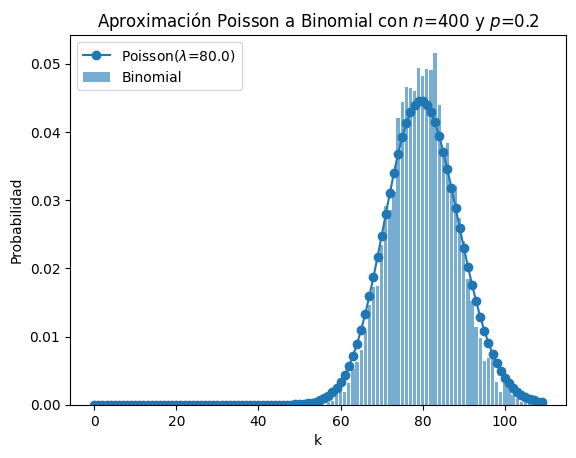

In [28]:
aprox(400, 0.2)

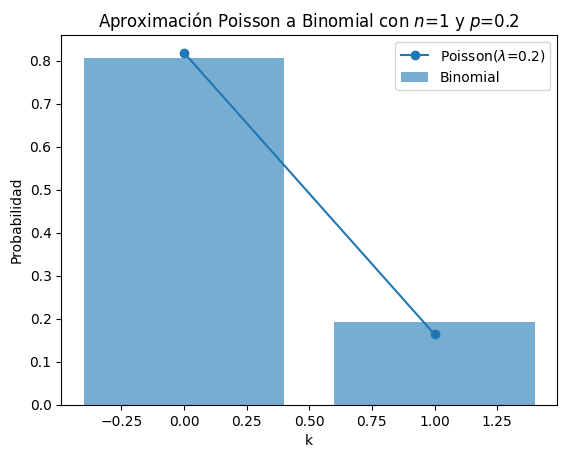

In [40]:
aprox(1,0.2)

### Ley Fuerte de los Grandes Números
Visualizaremos la convergencia de la ley fuerte de los grandes números.

**Pseudo-Código para visualizar la convergencia de la ley fuerte de los grandes números**

Nos interesa obtener una gráfica de convergencia para ejemplificar la ley fuerte de los grandes números de cierta distribución $F$ con media $\mu$.
1. Simular una muestra aleatoria $X_1, X_2, ...X_n$ de $F$.
2. Calcular los cocientes $\displaystyle S_n = \frac{\sum_{i=1}^mX_i}{m}$.
3. Graficar $m$ contra $S_m$ y una línea horizontal de $\mu$.

### Distribución Bernoulli

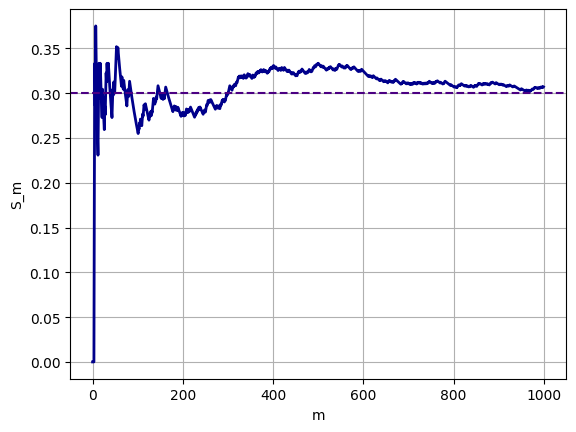

In [63]:
# Tamaño de la muestra aleatoria
N = 1000
p = 0.3

# Muestra ber(p)
ber1 = np.random.binomial(n=1, p=p, size=N)

# Aquí guardaremos las medias truncadas
S1 = []
# Calculamos las medias truncadas y las guardamos en la lista S
for i in range(len(ber1)):
  S1.append(sum(ber1[:i+1])/len(ber1[:i+1]))

# Graficamos la convergencia de la sucesión
plt.figure()
plt.plot(S1, color = 'darkblue', linewidth = 2, label = 'Medias Truncadas')
plt.axhline(y=p, color='indigo', ls = '--', label = 'Esperanza de la Distribución')
plt.xlabel('m')
plt.ylabel('S_m')
plt.grid()
plt.show()

Ahora haremos una función para visualizar esto

In [64]:
# Función para visualizar la convergencia
def bernoulli_lfgn(p, N):
  ber1 = np.random.binomial(n=1, p=p, size=N)
  S1 = []
  for i in range(len(ber1)):
    S1.append(sum(ber1[:i+1])/len(ber1[:i+1]))
  plt.figure()
  plt.plot(S1, color = 'darkblue', linewidth = 2, label = 'Medias Truncadas')
  plt.axhline(y=p, color='indigo', ls = '--', label = 'Esperanza de la Distribución')
  plt.xlabel('m')
  plt.ylabel('S_m')
  plt.grid()
  plt.show()
  return None

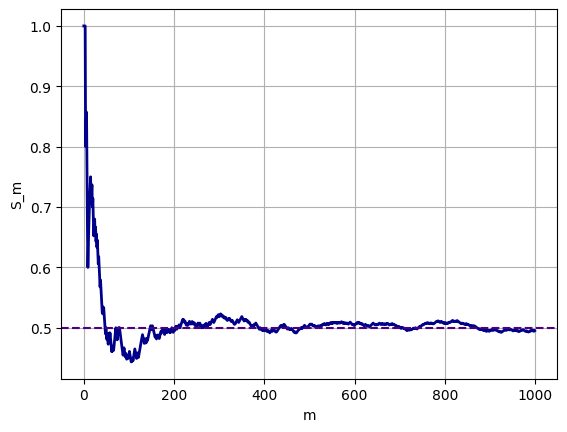

In [65]:
# Ejemplos
bernoulli_lfgn(0.5, 1000)

### Distribución Geométrica
Definimos una función para visualizar la convergencia de esta distribución.

In [78]:
def geo_lfgn(p, N):
  # Muestra geométrica(p)
  geo1 = np.random.geometric(p=p, size=N)

  # Aquí guardaremos las medias truncadas
  S2 = []
  # Calculamos las medias truncadas y las guardamos en la lista S
  for i in range(len(geo1)):
    S2.append(sum(geo1[:i+1])/len(geo1[:i+1]))

  # Graficamos la convergencia de la sucesión
  plt.figure()
  plt.plot(S2, color = 'darkblue', linewidth = 2, label = 'Medias Truncadas')
  plt.axhline(y=1/p, color='indigo', ls = '--', label = 'Esperanza de la Distribución')
  plt.xlabel('m')
  plt.ylabel('S_m')
  plt.grid()
  plt.show()
  return None

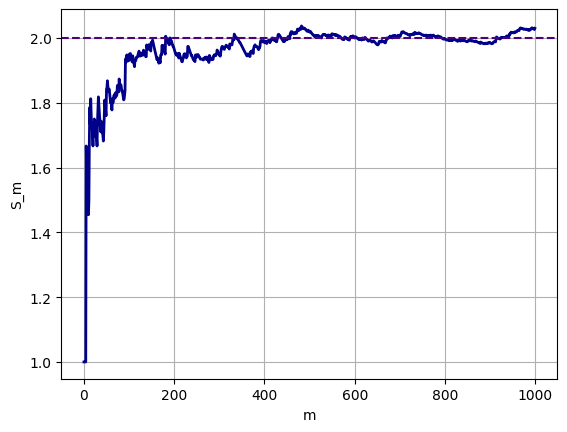

In [79]:
geo_lfgn(0.5, 1000)

### Distribución Exponencial
Definimos una función para visualizar la convergencia de esta distribución.

In [73]:
def exp_lfgn(N, lam): # Recibe la media de la distribución
  # Muestra exp(1/lam)
  exp1 = np.random.exponential(scale=lam, size=N)

  # Aquí guardaremos las medias truncadas
  S = []
  # Calculamos las medias truncadas y las guardamos en la lista S
  for i in range(len(exp1)):
    S.append(sum(exp1[:i+1])/len(exp1[:i+1]))

  # Graficamos la convergencia de la sucesión
  plt.figure()
  plt.plot(S, color = 'darkblue', linewidth = 2, label = 'Medias Truncadas')
  plt.axhline(y=lam, color='indigo', ls = '--', label = 'Esperanza de la Distribución')
  plt.xlabel('m')
  plt.ylabel('S_m')
  plt.grid()
  plt.show()
  return None

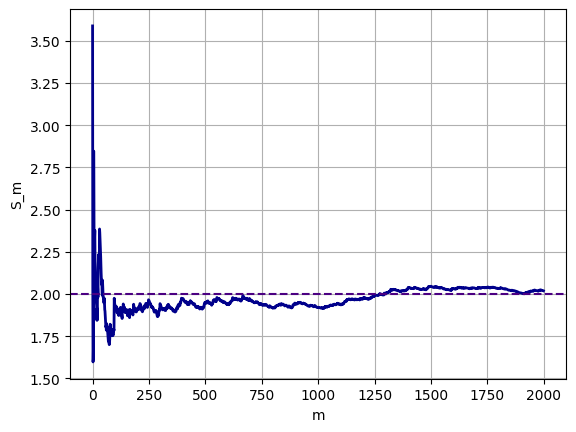

In [77]:
# Ejemplos
exp_lfgn(2000, 2)

### Distribución Normal
Definimos una función para visualizar la convergencia de esta distribución.

In [80]:
def normal_lfgn(mu, sigma, N):
  nor = np.random.normal(mu, sigma, size=N)
  S = []
  for i in range(len(nor)):
    S.append(sum(nor[:i+1])/len(nor[:i+1]))
  plt.figure()
  plt.plot(S, color = 'darkblue', linewidth = 2, label = 'Medias Truncadas')
  plt.axhline(y=mu, color='indigo', ls = '--', label = 'Esperanza de la Distribución')
  plt.xlabel('m')
  plt.ylabel('S_m')
  plt.grid()
  plt.show()
  return None


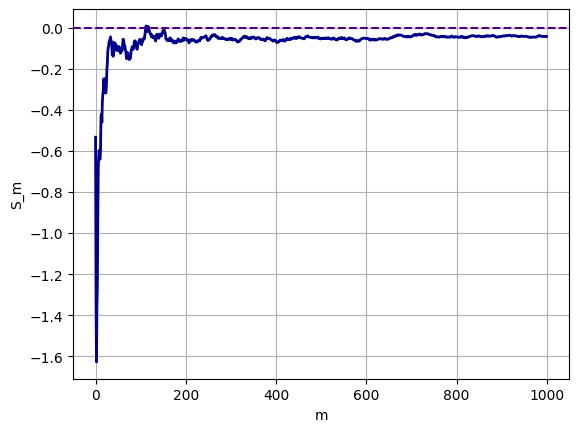

In [81]:
normal_lfgn(0, 1, 1000)

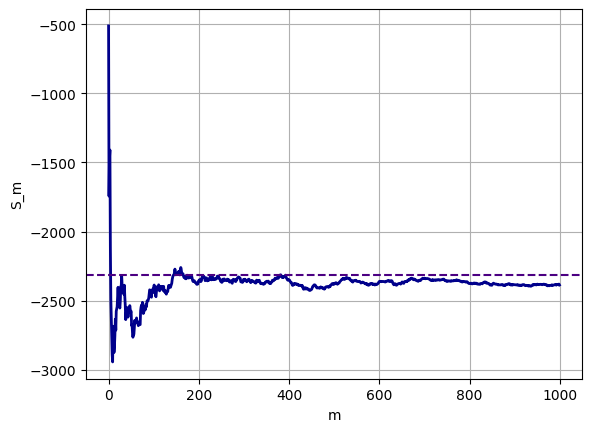

In [83]:
normal_lfgn(-2312, 2045, 1000)